# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

### First Steps

In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor

from pmdarima import auto_arima

In [3]:
data = pd.read_csv('/datasets/taxi.csv')

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB
None


### Data Cleanup

#### Missing Values Check

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

datetime      0
num_orders    0
dtype: int64


#### Duplicates Check

In [6]:
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


### Initial Exploration

         num_orders
count  26496.000000
mean      14.070463
std        9.211330
min        0.000000
25%        8.000000
50%       13.000000
75%       19.000000
max      119.000000
AxesSubplot(0.125,0.11;0.775x0.77)


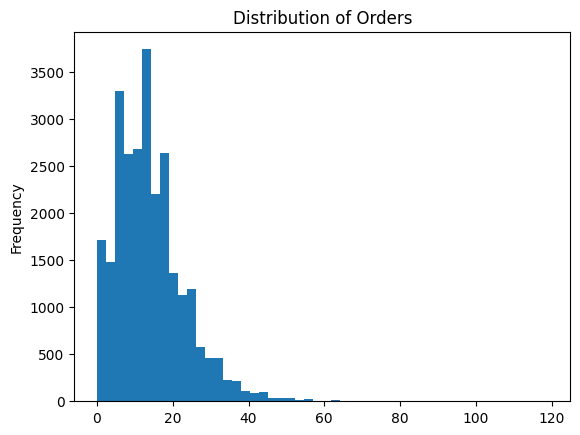

In [7]:
print(data.describe())
print(data['num_orders'].plot(kind='hist', bins=50, title='Distribution of Orders'))

<AxesSubplot:title={'center':'Number of Orders Over Time'}>

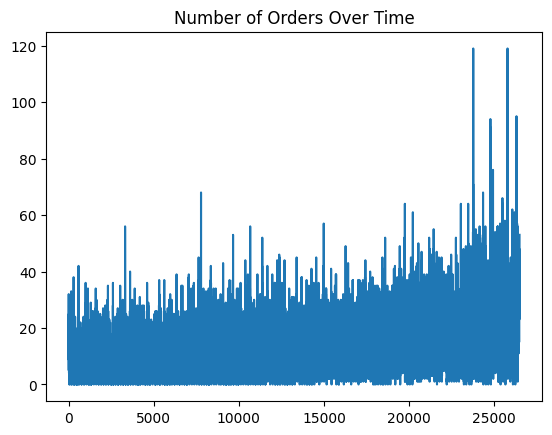

In [8]:
data['num_orders'].plot(title='Number of Orders Over Time')

#### Conclusions

Looking over the initial data, there are some general trends associated with it, including the fact the trends skew towards lower numbers of taxi orders (roughly 10-20 taxi orders per hour), but has stadily grown over time. 

## Analysis

### Date/Time Analysis

In [9]:
data_time = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
print(data.index.is_monotonic)

True


#### Data Plots (by month)

##### March 2018

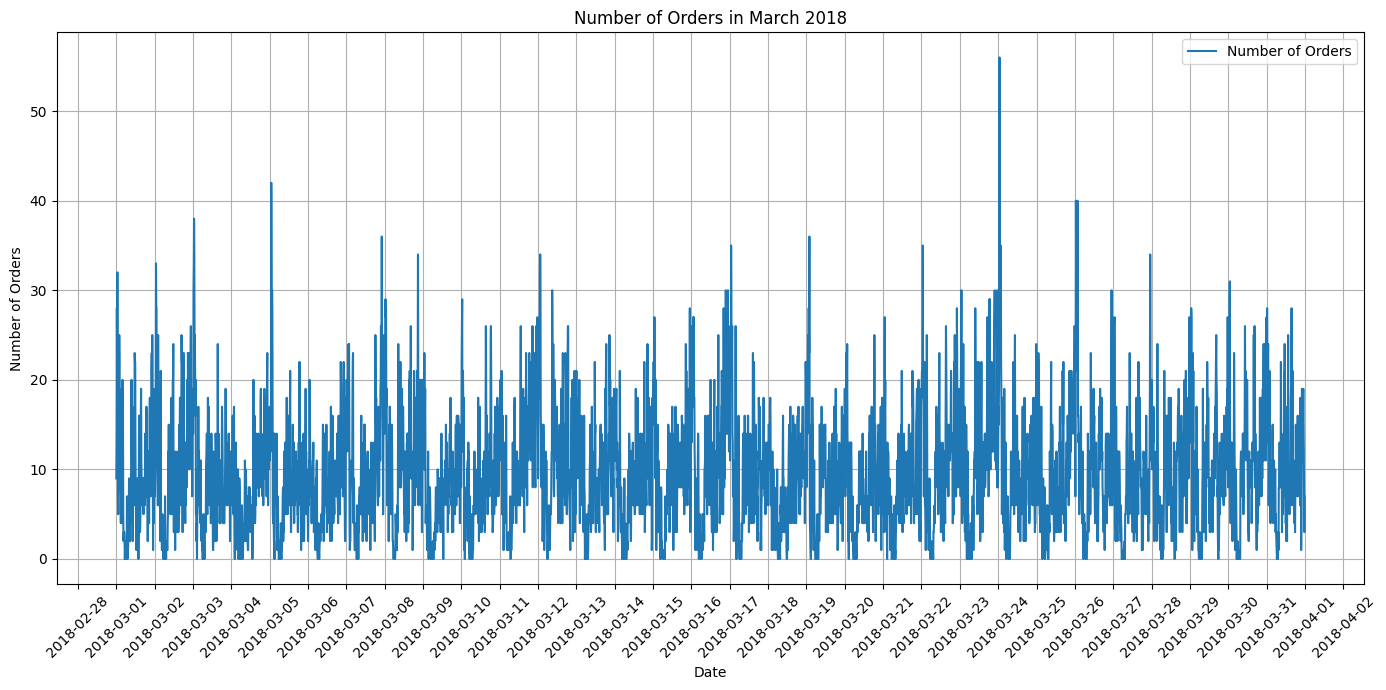

In [10]:
start_date = '2018-03-01'
end_date = '2018-03-31'
filtered_data = data_time.loc[start_date:end_date]

plt.figure(figsize=(14, 7))
plt.plot(filtered_data.index, filtered_data['num_orders'], label='Number of Orders')
plt.title('Number of Orders in March 2018')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
    
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### April 2018

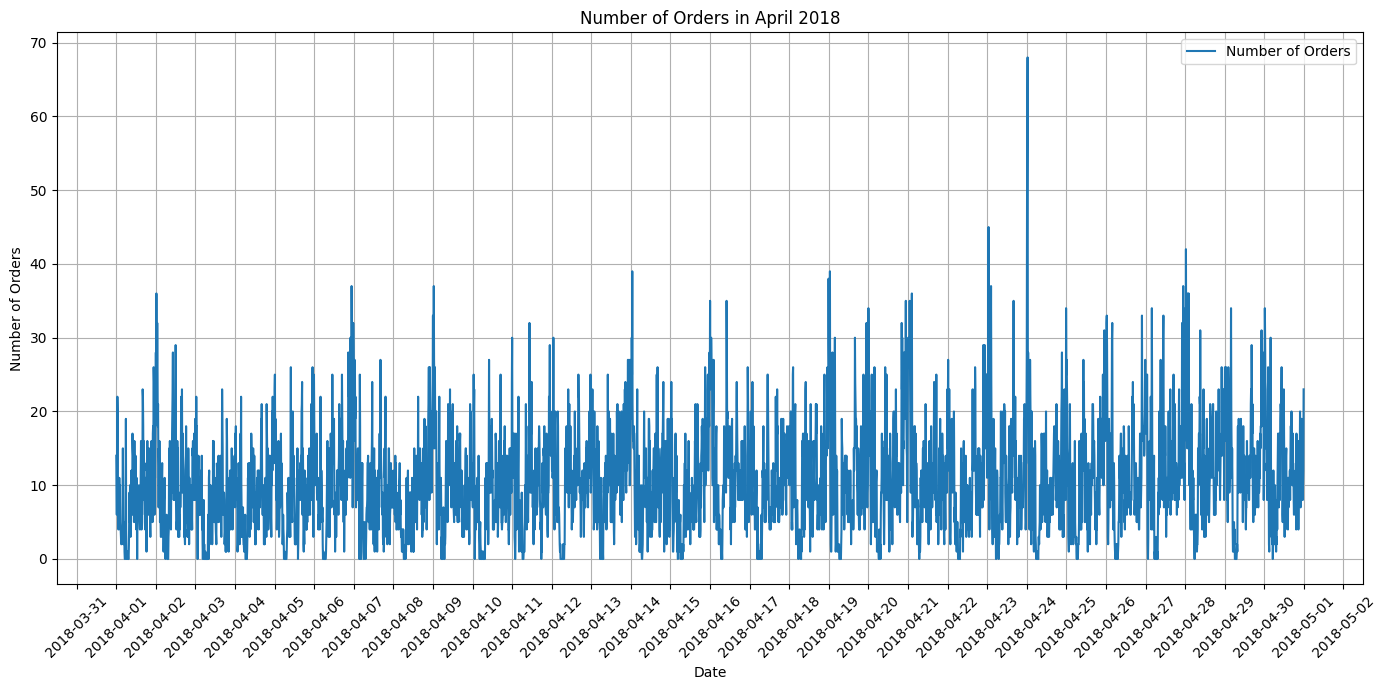

In [11]:
start_date = '2018-04-01'
end_date = '2018-04-30'
filtered_data = data_time.loc[start_date:end_date]

plt.figure(figsize=(14, 7))
plt.plot(filtered_data.index, filtered_data['num_orders'], label='Number of Orders')
plt.title('Number of Orders in April 2018')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
    
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### May 2018

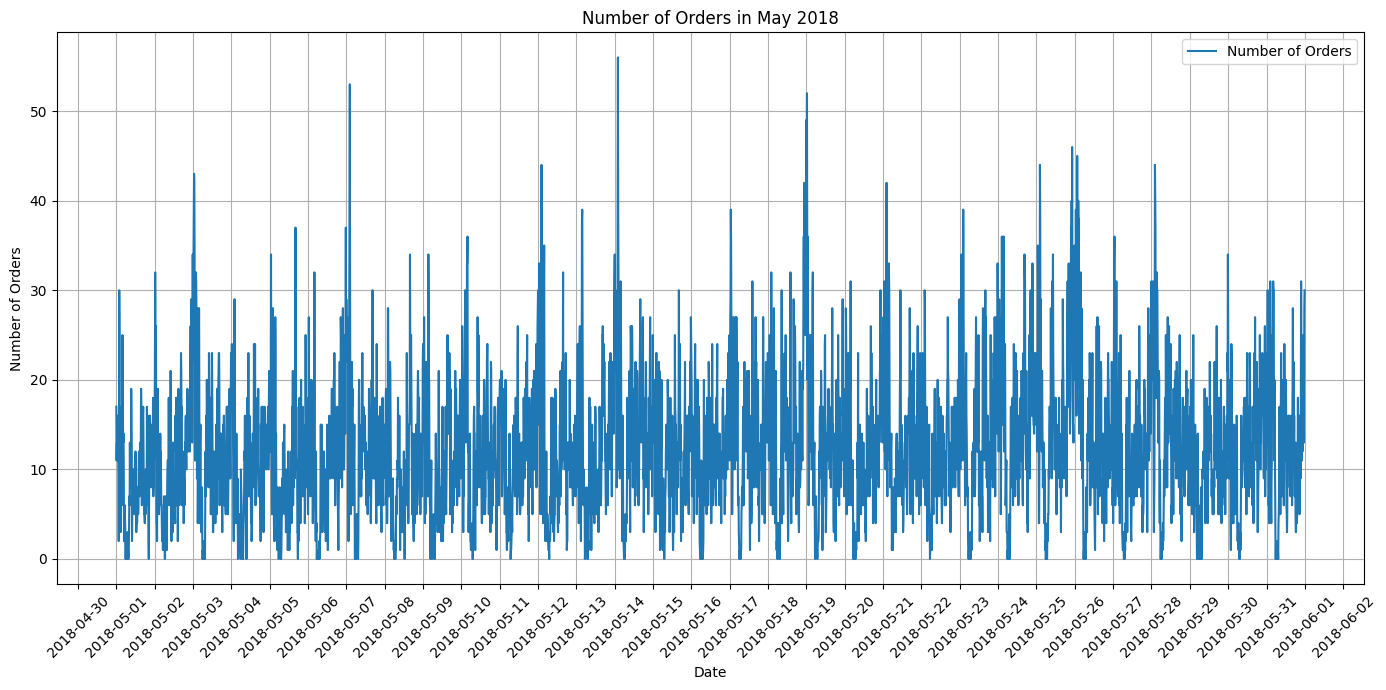

In [12]:
start_date = '2018-05-01'
end_date = '2018-05-31'
filtered_data = data_time.loc[start_date:end_date]

plt.figure(figsize=(14, 7))
plt.plot(filtered_data.index, filtered_data['num_orders'], label='Number of Orders')
plt.title('Number of Orders in May 2018')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
    
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### June 2018

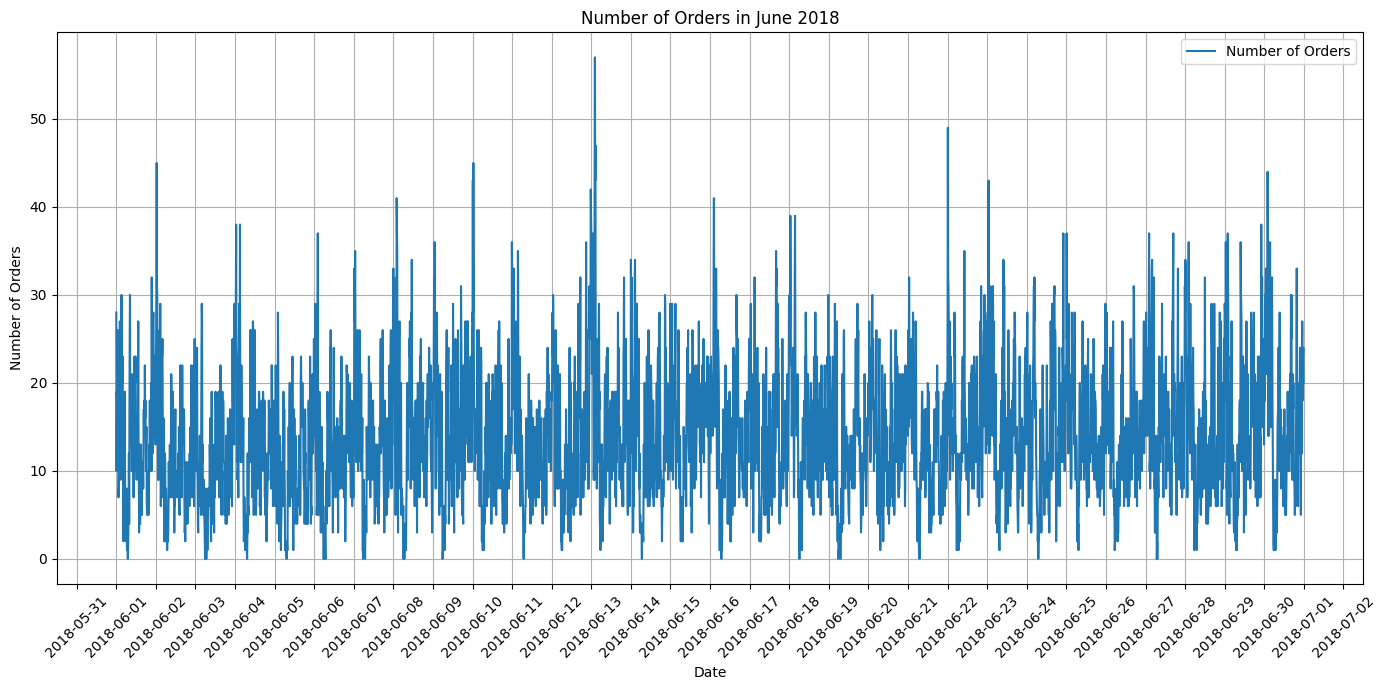

In [13]:
start_date = '2018-06-01'
end_date = '2018-06-30'
filtered_data = data_time.loc[start_date:end_date]

plt.figure(figsize=(14, 7))
plt.plot(filtered_data.index, filtered_data['num_orders'], label='Number of Orders')
plt.title('Number of Orders in June 2018')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
    
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### July 2018

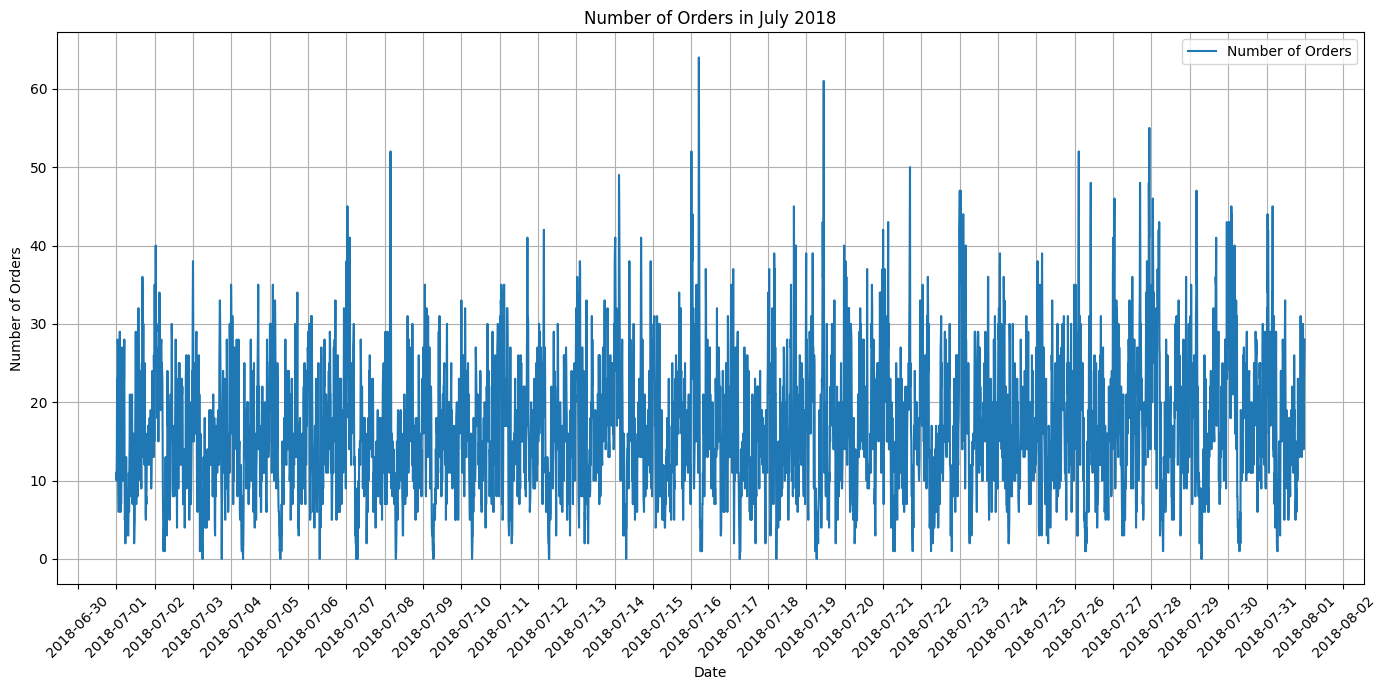

In [14]:
start_date = '2018-07-01'
end_date = '2018-07-31'
filtered_data = data_time.loc[start_date:end_date]

plt.figure(figsize=(14, 7))
plt.plot(filtered_data.index, filtered_data['num_orders'], label='Number of Orders')
plt.title('Number of Orders in July 2018')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
    
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### August 2018

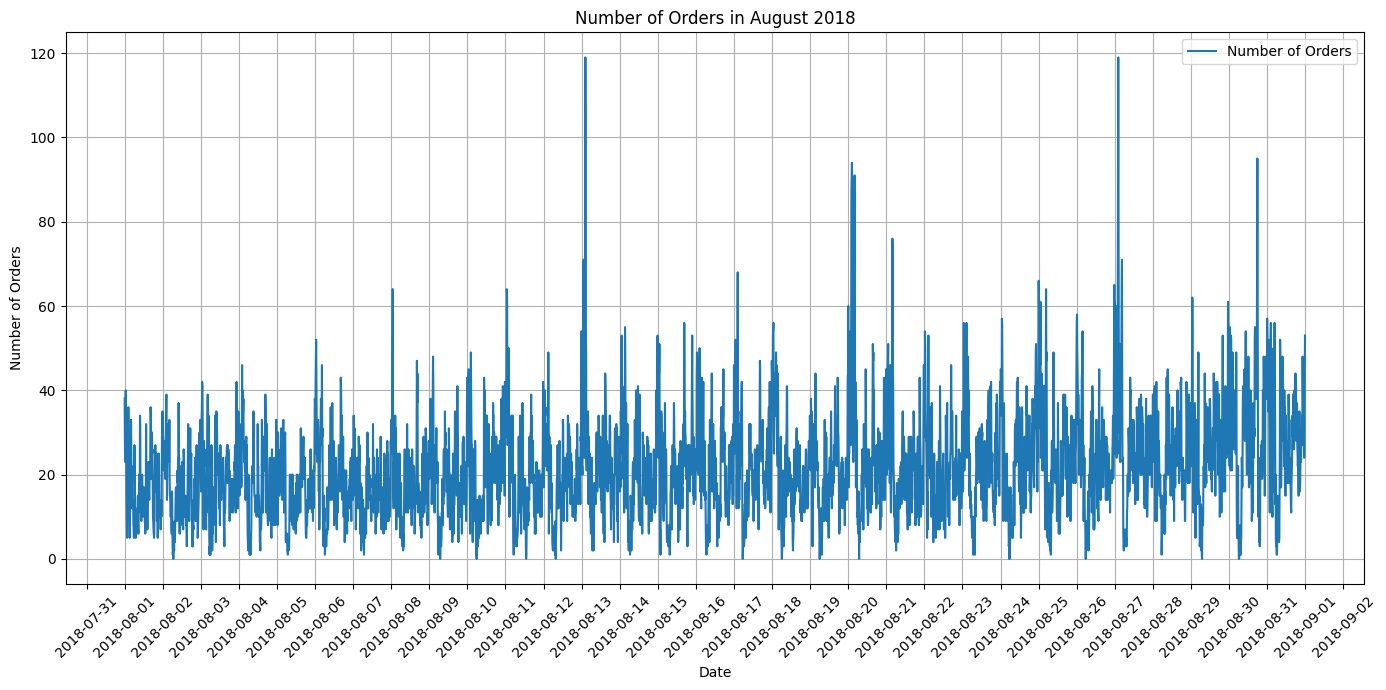

In [15]:
start_date = '2018-08-01'
end_date = '2018-08-31'
filtered_data = data_time.loc[start_date:end_date]

plt.figure(figsize=(14, 7))
plt.plot(filtered_data.index, filtered_data['num_orders'], label='Number of Orders')
plt.title('Number of Orders in August 2018')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
    
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusions

Looking over the initial data by month and by day (as well as extra determinations from looking at the calendar), there are some distinct patterns that show the number of airport taxi orders peaked at arounf the late night and early morning portions of the day, with Sundays usually seeing the highest peaks, as more people head to their homes and offices for the coming work week. Overall, there is also a gradual growth by around summer, with orders sometimes peaking by 120 by August.

### Descriptive Statistics

#### Initial Calculations (Total)

In [16]:
mean_orders = data_time['num_orders'].mean()
median_orders = data_time['num_orders'].median()
mode_orders = data_time['num_orders'].mode()[0]
std_orders = data_time['num_orders'].std()
range_orders = data_time['num_orders'].max() - data_time['num_orders'].min()

print(f"Mean: {mean_orders}")
print(f"Median: {median_orders}")
print(f"Mode: {mode_orders}")
print(f"Standard Deviation: {std_orders}")
print(f"Range: {range_orders}")

Mean: 14.070463466183575
Median: 13.0
Mode: 9
Standard Deviation: 9.211329545049038
Range: 119


#### Month-by-Month Statistics

                 mean  median        std  mode  range
datetime                                             
2018-03-31   9.580645       9   6.411901     7     56
2018-04-30  10.634028      10   6.926271     9     68
2018-05-31  12.280466      11   7.607219    11     56
2018-06-30  13.867130      13   7.354669    10     57
2018-07-31  16.667787      16   8.414885    15     64
2018-08-31  21.275314      20  11.901254    18    119


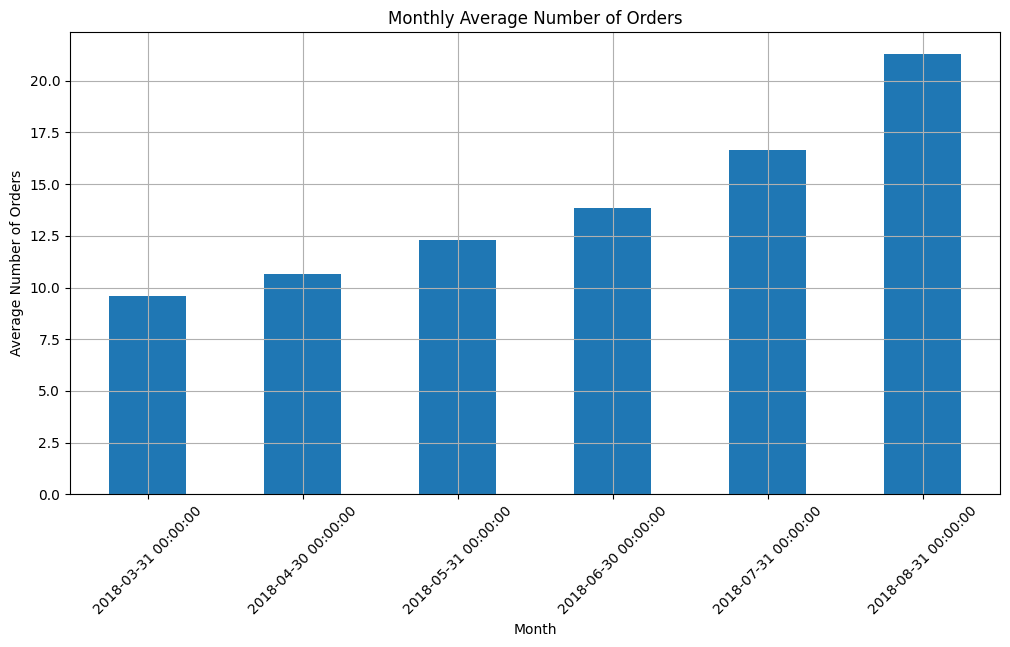

In [17]:
monthly_stats = data_time['num_orders'].resample('M').agg(['mean', 'median', 'std'])
monthly_stats['mode'] = data_time['num_orders'].resample('M').apply(lambda x: x.mode()[0])
monthly_stats['range'] = data_time['num_orders'].resample('M').apply(lambda x: x.max() - x.min())

print(monthly_stats)

monthly_stats['mean'].plot(kind='bar', figsize=(12, 6), title='Monthly Average Number of Orders')
plt.xlabel('Month')
plt.ylabel('Average Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Finding Outliers from Standard Deviation

In [18]:
def find_outliers_std(group):
    mean = group.mean()
    std = group.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    return group[(group < lower_bound) | (group > upper_bound)]

monthly_outliers = data_time['num_orders'].resample('M').apply(find_outliers_std)

for month, outliers in monthly_outliers.groupby(level=0):
    print(f"Month: {month.strftime('%Y-%m')} - Number of Outliers: {len(outliers)}")
    print(outliers)

Month: 2018-03 - Number of Outliers: 175
datetime    datetime           
2018-03-31  2018-03-01 00:20:00    28
            2018-03-01 00:40:00    32
            2018-03-01 01:50:00    25
            2018-03-01 11:30:00    23
            2018-03-01 22:10:00    23
                                   ..
            2018-03-31 00:20:00    28
            2018-03-31 01:00:00    24
            2018-03-31 11:20:00    24
            2018-03-31 13:30:00    25
            2018-03-31 15:40:00    28
Name: num_orders, Length: 175, dtype: int64
Month: 2018-04 - Number of Outliers: 183
datetime    datetime           
2018-04-30  2018-04-01 22:40:00    26
            2018-04-02 00:00:00    28
            2018-04-02 00:20:00    36
            2018-04-02 00:40:00    26
            2018-04-02 00:50:00    32
                                   ..
            2018-04-30 00:20:00    34
            2018-04-30 00:30:00    30
            2018-04-30 02:20:00    26
            2018-04-30 03:50:00    30
            

#### Conclusions

On average, there were around 14 taxi orders on any given hour, with 13 being the general median. Thus far, the average number has actually steadily increased each month, going from just under 10 trips per hour in March to just over 20 trips per hour. The monthly median also corroborated with this rise, coupled with the mode, range, and standard deviation. This low a number is mainly due to the lower frequency of trip orders during off-peak times.

When taking the standard deviation into account, the number of outliers at any given time is fairly consistent, averaging around 170.2 outliers per month. This could suggest that there are abnormal spikes in the data, or they could mark special events in and around the airport, so this might warrant further analysis.

### Correlation Analysis

#### Day of the Week

In [19]:
data_time['day_of_week'] = data_time.index.dayofweek

#### Weekend vs. Weekday

In [20]:
data_time['is_weekend'] = data_time['day_of_week'].isin([5, 6])

#### Month-by-Month

In [21]:
data_time['month'] = data_time.index.month

#### Hour-by-Hour

In [22]:
data_time['hour'] = data_time.index.hour

#### Heatmaps

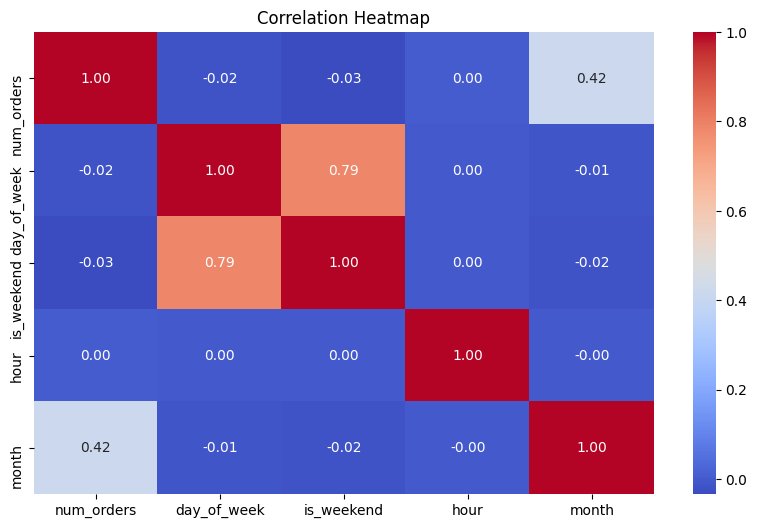

In [23]:
correlation_matrix = data_time[['num_orders', 'day_of_week', 'is_weekend', 'hour', 'month']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Conclusions

As can be gleaned from the heatmap, there is a strong degree of correlation between the frequency by day and whether or not that day was on a weekday or weekend, and some moderate correlation between the frequency and the month of the year, suggesting some seasonality involved. 

## Training

### Initial Prep Work

In [24]:
train_size = int(len(data_time) * 0.8)
val_size = int(len(data_time) * 0.1)

X_train = data_time.iloc[:train_size].drop(columns=['num_orders'])
y_train = data_time.iloc[:train_size]['num_orders']

X_val = data_time.iloc[train_size:train_size + val_size].drop(columns=['num_orders'])
y_val = data_time.iloc[train_size:train_size + val_size]['num_orders']

X_test = data_time.iloc[train_size + val_size:].drop(columns=['num_orders'])
y_test = data_time.iloc[train_size + val_size:]['num_orders']

X_train_features = X_train[['month', 'day_of_week', 'hour', 'is_weekend']]
X_val_features = X_val[['month', 'day_of_week', 'hour', 'is_weekend']]
X_test_features = X_test[['month', 'day_of_week', 'hour', 'is_weekend']]

print("Training set dates:", data_time.index.min(), "to", data_time.index[train_size-1])
print("Validation set dates:", data_time.index[train_size], "to", data_time.index[train_size + val_size - 1])
print("Test set dates:", data_time.index[train_size + val_size], "to", data_time.index.max())

Training set dates: 2018-03-01 00:00:00 to 2018-07-26 04:30:00
Validation set dates: 2018-07-26 04:40:00 to 2018-08-13 14:00:00
Test set dates: 2018-08-13 14:10:00 to 2018-08-31 23:50:00


### Data Encoding (One-Hot Encoding)

In [25]:
X_train_onehot = pd.get_dummies(X_train, drop_first=True)
X_val_onehot = pd.get_dummies(X_val, drop_first=True)
X_test_onehot = pd.get_dummies(X_test, drop_first=True)

X_train_onehot, X_val_onehot = X_train_onehot.align(X_val_onehot, join='left', axis=1, fill_value=0)
X_train_onehot, X_test_onehot = X_train_onehot.align(X_test_onehot, join='left', axis=1, fill_value=0)

### Root Squared Mean Error

In [26]:
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

## Testing

### Linear Regression

#### Validation Set

In [27]:
model = LinearRegression()

model.fit(X_train_onehot, y_train)

predictions = model.predict(X_val_onehot)
mse = mean_squared_error(y_val, predictions)
rmse = calculate_rmse(y_val, predictions)
r2 = r2_score(y_val, predictions)

print(f"Root Mean Squared Error - Validation Set: {rmse}")
print(f"Mean Squared Error - Validation Set: {mse}")
print(f"R-squared - Validation Set: {r2}")

Root Mean Squared Error - Validation Set: 10.067432530158147
Mean Squared Error - Validation Set: 101.35319774928648
R-squared - Validation Set: -0.03329890678045766


#### Test Set

In [28]:
test_predictions = model.predict(X_test_onehot)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = calculate_rmse(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Root Mean Squared Error - Test Set: {test_rmse}")
print(f"Mean Squared Error - Test Set: {test_mse}")
print(f"R-squared - Test Set: {test_r2}")

Root Mean Squared Error - Test Set: 13.825806120641497
Mean Squared Error - Test Set: 191.15291488556787
R-squared - Test Set: -0.21158664024917218


### Random Forest regression

#### Validation Set

In [29]:
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}

rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

random_search.fit(X_train_onehot, y_train)

best_rf = random_search.best_estimator_

val_predictions = best_rf.predict(X_val_onehot)

val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)

print(f"Root Mean Squared Error - Validation Set: {val_rmse}")
print(f"Mean Squared Error - Validation Set: {val_mse}")
print(f"R-squared - Validation Set: {val_r2}")
print(f"Best parameters - Validation Set: {random_search.best_params_}")

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Root Mean Squared Error - Validation Set: 8.15926370974518
Mean Squared Error - Validation Set: 66.57358428516466
R-squared - Validation Set: 0.32128030106675554
Best parameters - Validation Set: {'n_estimators': 100, 'max_depth': 10}


#### Test Set

In [30]:
test_predictions = best_rf.predict(X_test_onehot)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print(f"Root Mean Squared Error - Test Set: {test_rmse}")
print(f"Mean Squared Error - Test Set: {test_mse}")
print(f"R-squared - Test Set: {test_r2}")

Root Mean Squared Error - Test Set: 12.614486679847014
Mean Squared Error - Test Set: 159.12527419603774
R-squared - Test Set: -0.008585490089545456


### Decision Tree regression

#### Validation Set

In [31]:
tree_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeRegressor(random_state=42)

random_search = RandomizedSearchCV(
    tree_model, 
    tree_param_grid,
    n_iter=5, 
    cv=5, 
    n_jobs=-1, 
    scoring='neg_root_mean_squared_error'
)

random_search.fit(X_train_onehot, y_train)
best_tree = random_search.best_estimator_

val_predictions = best_tree.predict(X_val_onehot)

val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)

print(f"Root Mean Squared Error - Validation Set: {val_rmse}")
print(f"Mean Squared Error - Validation Set: {val_mse}")
print(f"R-squared - Validation Set: {val_r2}")
print(f"Best parameters - Validation Set: {random_search.best_params_}")

Root Mean Squared Error - Validation Set: 8.17531528863648
Mean Squared Error - Validation Set: 66.83578006861336
R-squared - Validation Set: 0.31860720714948065
Best parameters - Validation Set: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}


#### Test Set

In [32]:
test_predictions = best_tree.predict(X_test_onehot)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print(f"Root Mean Squared Error - Test Set: {test_rmse}")
print(f"Mean Squared Error - Test Set: {test_mse}")
print(f"R-squared - Test Set: {test_r2}")

Root Mean Squared Error - Test Set: 12.648845838388556
Mean Squared Error - Test Set: 159.9933010433195
R-squared - Test Set: -0.014087314281835628


### K-Nearest Neighbors

#### Validation Set

In [33]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_model = KNeighborsRegressor()

random_search = RandomizedSearchCV(
    knn_model,
    knn_param_grid,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

random_search.fit(X_train_onehot, y_train)
best_knn = random_search.best_estimator_

val_predictions = best_knn.predict(X_val_onehot)

val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)

print(f"Root Mean Squared Error - Validation Set: {val_rmse}")
print(f"Mean Squared Error - Validation Set: {val_mse}")
print(f"R-squared - Validation Set: {val_r2}")
print(f"Best parameters - Validation Set: {random_search.best_params_}")

Root Mean Squared Error - Validation Set: 8.49651057230562
Mean Squared Error - Validation Set: 72.1906919053012
R-squared - Validation Set: 0.26401371952768304
Best parameters - Validation Set: {'weights': 'uniform', 'p': 2, 'n_neighbors': 7}


#### Test Set

In [34]:
test_predictions = best_knn.predict(X_test_onehot)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print(f"Root Mean Squared Error - Test Set: {test_rmse}")
print(f"Mean Squared Error - Test Set: {test_mse}")
print(f"R-squared - Test Set: {test_r2}")

Root Mean Squared Error - Test Set: 12.73649240511366
Mean Squared Error - Test Set: 162.21823878551797
R-squared - Test Set: -0.028189661847121794


### XGBoost regression

#### Validation Set

In [35]:
xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_model = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    xgb_model, 
    xgb_param_grid, 
    n_iter=5, 
    cv=5, 
    n_jobs=-1, 
    scoring='neg_root_mean_squared_error'
)

random_search.fit(X_train_onehot, y_train)
best_xgb = random_search.best_estimator_

val_predictions = best_xgb.predict(X_val_onehot)

val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)

print(f"Root Mean Squared Error - Validation Set: {val_rmse}")
print(f"Mean Squared Error - Validation Set: {val_mse}")
print(f"R-squared - Validation Set: {val_r2}")
print(f"Best parameters - Validation Set: {random_search.best_params_}")

Root Mean Squared Error - Validation Set: 8.072099246247165
Mean Squared Error - Validation Set: 65.15878624126404
R-squared - Validation Set: 0.33570420977947235
Best parameters - Validation Set: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}


#### Test Set

In [36]:
test_predictions = best_xgb.predict(X_test_onehot)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print(f"Root Mean Squared Error - Test Set: {test_rmse}")
print(f"Mean Squared Error - Test Set: {test_mse}")
print(f"R-squared - Test Set: {test_r2}")

Root Mean Squared Error - Test Set: 12.555337863039192
Mean Squared Error - Test Set: 157.63650885506553
R-squared - Test Set: 0.0008507677811112613


### ARIMA (AutoRegressive Integrated Moving Avg.)

#### Validation Set

In [37]:
model = auto_arima(y_train, 
                   seasonal=False, 
                   stepwise=True, 
                   trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True)

best_params = model.get_params()

val_predictions = model.predict(n_periods=len(y_val))

val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)

print(f"Root Mean Squared Error - Validation Set: {val_rmse}")
print(f"Mean Squared Error - Validation Set: {val_mse}")
print(f"R-squared - Validation Set: {val_r2}")
print(f"Best parameters - Validation Set: {best_params}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=135929.762, Time=0.80 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=135034.053, Time=1.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=134555.358, Time=5.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=135927.762, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=34.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=133214.658, Time=7.82 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=54.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=132418.513, Time=11.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=69.42 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=132282.410, Time=16.01 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=74.09 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=132251.889, Time=18.07 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=95.41 sec
 ARIMA(0,1,5)(0,0,0)[0]             : 

#### Test Set

In [38]:
model.fit(np.concatenate([y_train, y_val]))

test_predictions = model.predict(n_periods=len(y_test))

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print(f"Root Mean Squared Error - Test Set: {test_rmse}")
print(f"Mean Squared Error - Test Set: {test_mse}")
print(f"R-squared - Test Set: {test_r2}")

Root Mean Squared Error - Test Set: 13.481216691796117
Mean Squared Error - Test Set: 181.74320349116223
R-squared - Test Set: -0.15194496216706077


## Results and Conclusions

### Presentation of Findings

In [39]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    predictions = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    return rmse, mse, r2, training_time, prediction_time

def evaluate_arima(y_train, y_val, y_test):
    start_time = time.time()
    model = auto_arima(
        y_train,
        seasonal=False,
        stepwise=True,
        trace=False,
        error_action='ignore',
        suppress_warnings=True
    )
    training_time = time.time() - start_time

    start_time = time.time()
    val_predictions = model.predict(n_periods=len(y_val))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    val_r2 = r2_score(y_val, val_predictions)
    prediction_time = time.time() - start_time

    model.fit(np.concatenate([y_train, y_val]))
    test_predictions = model.predict(n_periods=len(y_test))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_r2 = r2_score(y_test, test_predictions)

    return test_rmse, test_r2, training_time, prediction_time

In [40]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    XGBRegressor(),
]

results = []

In [41]:
for model in models:
    X_train_final, X_test_final = X_train_onehot, X_test_onehot
    
    rmse, mse, r2, training_time, prediction_time = evaluate_model(model, X_train_final, X_test_final, y_train, y_test)
    
    results.append({
        'Model': model.__class__.__name__,
        'Root MSE': rmse,
        'MSE': mse,
        'R2 Score': r2,
        'Training Time (s)': training_time,
        'Prediction Time (s)': prediction_time
    })

test_rmse, test_r2, training_time, prediction_time = evaluate_arima(y_train, y_val, y_test)
results.append({
    'Model': 'ARIMA',
    'Root MSE': test_rmse,
    'MSE': mean_squared_error(y_test, test_predictions),
    'R2 Score': test_r2,
    'Training Time (s)': training_time,
    'Prediction Time (s)': prediction_time
})

results_df = pd.DataFrame(results)
print(results_df)

                   Model   Root MSE         MSE  R2 Score  Training Time (s)  \
0       LinearRegression  13.825806  191.152915 -0.211587           0.005508   
1  RandomForestRegressor  12.527854  156.947118  0.005220           0.907253   
2  DecisionTreeRegressor  12.518931  156.723622  0.006637           0.014085   
3    KNeighborsRegressor  12.725870  161.947763 -0.026475           0.018211   
4           XGBRegressor  12.507021  156.425566  0.008526           1.448186   
5                  ARIMA  13.481217  181.743203 -0.151945         518.373455   

   Prediction Time (s)  
0             0.001415  
1             0.013859  
2             0.001388  
3             0.007000  
4             0.005781  
5             0.041561  


### Conclusion

Six various models were trained on both the validation and the test data (the results of the latter being shown below). In terms of performance, the linear regression model had a faster training and prediction time (at .005 and .06 seconds respectively), but was comparatively worse in terms of accuracy compared to the best performer, the XGBoost model, which had the lowest Root Mean Squared Error score of 12.51. Meanwhile, the ARIMA model had the slowest training time of all the models, at 518.37 seconds, while the Decision Tree model was reasonable both in terms of speed and accuracy.

In terms of recommendations, the Decision Tree model stands out for both speed and accuracy and should thus be used for all of Sweet Lift Taxi's models going forward.

# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48